# Raportowanie - analiza trendów i zależności w danych sprzedażowych

Celem tego notebooka jest pokazanie podstawowych narzędzi stosowanych w EDA (eng. Exploratory Data Analysis).

## Importy bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import os

## Wczytanie danych

In [2]:
fileName = "Warsztaty.csv"

# ścieżki dostępu do plików
dataFolderPath = os.path.join(os.path.pardir, "data")

dataRawPath = os.path.join(dataFolderPath, fileName)

dataRaw = pd.read_csv(dataRawPath, index_col="receipt_id", parse_dates=True)

---------
### Cheat Sheet:
1. Ładowanie danych do  tabeli DataFrame z pliku *.csv*:
```python
df = pd.read_csv('ścieżka_do_pliku.csv')
```
2. Wyświetl `n` pierwszych wierszy tabeli DataFrame (`n` domyślnie równe 5):
    - jeśli to ostatnia komenda w komórce:
```python
df.head(n)
```
    - jeśli tak nie jest:
```python
display(df.head(n))
```
3. Wyświetlanie kolumn DataFrame'u : 
```python
df.columns
```
4. Wyświetlanie typów danych dla każdej kolumny : 
```python
df.dtypes
```
5. Wyświetlanie typów danych i nulli :
```python
df.info()
```
6. Wyświetlanie wartości unikalnych w kolumnie :
```python
df.nazwa_kolumny.unique()
```
7. Grupowanie po określonej kolumnie :
```python
df.groupby("nazwa_kolumny")
```
8. Wyliczanie procentowej zmiany wartości kolumny względem zmiany indeksu :
```python
df.nazwa_kolumnt.pct_change()
```
9. Obrót tabeli DataFrame (tzw. *pivot*) sumujący wartości z ```kolumna_do_zliczenia``` we wszystkich kombinacjach ```kolumna_x``` z ```kolumna_y```.
```python
df = pd.pivot_table(df, values='kolumna_do_zliczania', index='kolumna_x', columns='kolumna_y', aggfunc=np.sum)
```
10. Sortowanie malejące wierszy w tabeli DataFrame według wartości w kolumnie/kolumnach:
 - dla jednej kolumny
```python
df = df.sort_values('kolumna', ascending=False)
```
 - dla wielu kolumn
```python
df.sort_values(['kolumna_1', 'kolumna_2'], ascending=False)
```


## Szybki przegląd danych - co zawiera dataframe?

In [3]:
dataRaw.head(10)

,date,basket_segment_id,client_segment_id,case_id,client_id,location_id,payment_type,product_id,quantity,unit_price,cost,cost_incl_vat,product_category,product_subcategory,product_name,weekday
receipt_id,,,,,,,,,,,,,,,,
1,2016-01-01 07:10:10,NaN,4,1,1786,1,cash,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
3,2016-01-01 07:17:54,NaN,2,1,689,1,credit_card,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
7,2016-01-01 07:31:08,NaN,3,1,905,3,debit_card,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
10,2016-01-01 08:10:43,NaN,2,1,751,2,cash,54,6,0.99,5.94,6.09,Pieczywo,Bułka,Ciabatka,4
11,2016-01-01 08:11:19,NaN,6,1,1910,3,debit_card,54,8,0.99,7.92,8.52,Pieczywo,Bułka,Ciabatka,4
16,2016-01-01 08:23:34,NaN,3,1,974,2,debit_card,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
18,2016-01-01 09:03:27,NaN,3,1,1002,2,debit_card,54,9,0.99,8.91,9.74,Pieczywo,Bułka,Ciabatka,4
20,2016-01-01 09:42:18,NaN,2,1,805,1,debit_card,54,9,0.99,8.91,9.74,Pieczywo,Bułka,Ciabatka,4
21,2016-01-01 10:16:53,NaN,4,1,1614,3,cash,54,8,0.99,7.92,9.74,Pieczywo,Bułka,Ciabatka,4


### Szybki przegląd danych - jakie mamy kolumny? 

In [4]:
dataRaw.columns

Index(['date', 'basket_segment_id', 'client_segment_id', 'case_id',
       'client_id', 'location_id', 'payment_type', 'product_id', 'quantity',
       'unit_price', 'cost', 'cost_incl_vat', 'product_category',
       'product_subcategory', 'product_name', 'weekday'],
      dtype='object')

### Szybki przegląd danych - jakie typy danych mają poszczególne kolumny?

In [5]:
dataRaw.dtypes

date                    object
basket_segment_id      float64
client_segment_id        int64
case_id                  int64
client_id                int64
location_id              int64
payment_type            object
product_id               int64
quantity                 int64
unit_price             float64
cost                   float64
cost_incl_vat          float64
product_category        object
product_subcategory     object
product_name            object
weekday                  int64
dtype: object

### Szybki przegląd danych - ile mamy nulli w danych, jakie mamy typy ?

In [6]:
dataRaw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499507 entries, 1 to 179594
Data columns (total 16 columns):
date                   499507 non-null object
basket_segment_id      0 non-null float64
client_segment_id      499507 non-null int64
case_id                499507 non-null int64
client_id              499507 non-null int64
location_id            499507 non-null int64
payment_type           499507 non-null object
product_id             499507 non-null int64
quantity               499507 non-null int64
unit_price             499507 non-null float64
cost                   499507 non-null float64
cost_incl_vat          499507 non-null float64
product_category       499507 non-null object
product_subcategory    499507 non-null object
product_name           499507 non-null object
weekday                499507 non-null int64
dtypes: float64(4), int64(7), object(5)
memory usage: 64.8+ MB


### Szybki przegląd danych - podstawowe filtrowanie + wartości unikalne

In [7]:
dataRaw[dataRaw.product_category == "Napoje"].product_subcategory.unique()

array(['Wino', 'Piwo', 'Woda', 'Coca-cola', 'Wódka'], dtype=object)

## Podstawowe przekształcenia danych

### Podstawowe przekształcenia danych - wyrzucenie pustej kolumny

In [8]:
dataRaw.drop("basket_segment_id", axis=1, inplace=True)

#dataRaw = dataRaw.drop("basket_segment_id", axis=1)

In [9]:
dataRaw.head(10)

,date,client_segment_id,case_id,client_id,location_id,payment_type,product_id,quantity,unit_price,cost,cost_incl_vat,product_category,product_subcategory,product_name,weekday
receipt_id,,,,,,,,,,,,,,,
1,2016-01-01 07:10:10,4,1,1786,1,cash,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
3,2016-01-01 07:17:54,2,1,689,1,credit_card,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
7,2016-01-01 07:31:08,3,1,905,3,debit_card,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
10,2016-01-01 08:10:43,2,1,751,2,cash,54,6,0.99,5.94,6.09,Pieczywo,Bułka,Ciabatka,4
11,2016-01-01 08:11:19,6,1,1910,3,debit_card,54,8,0.99,7.92,8.52,Pieczywo,Bułka,Ciabatka,4
16,2016-01-01 08:23:34,3,1,974,2,debit_card,54,5,0.99,4.95,4.87,Pieczywo,Bułka,Ciabatka,4
18,2016-01-01 09:03:27,3,1,1002,2,debit_card,54,9,0.99,8.91,9.74,Pieczywo,Bułka,Ciabatka,4
20,2016-01-01 09:42:18,2,1,805,1,debit_card,54,9,0.99,8.91,9.74,Pieczywo,Bułka,Ciabatka,4
21,2016-01-01 10:16:53,4,1,1614,3,cash,54,8,0.99,7.92,9.74,Pieczywo,Bułka,Ciabatka,4


### Podstawowe przekształcenia danych - zmiana typu danych w kolumnie

In [10]:
# Change formats
dataRaw['datetime'] = pd.to_datetime(dataRaw.date)

### Podstawowe przekształcenia danych - dodanie nowych kolumn

In [11]:
# Create new Invoice Date and Time variables
dataRaw['date'] = dataRaw['datetime'].dt.date
dataRaw['time'] = dataRaw['datetime'].dt.time

dataRaw['second'] = dataRaw['datetime'].dt.second
dataRaw['minute'] = dataRaw['datetime'].dt.minute
dataRaw['hour'] = dataRaw['datetime'].dt.hour

dataRaw['year'] = dataRaw['datetime'].dt.year
dataRaw['month'] = dataRaw['datetime'].dt.month
dataRaw['day'] = dataRaw['datetime'].dt.day
dataRaw['weekday'] = dataRaw['datetime'].dt.weekday 


# Create other time-related data
dataRaw['weekend'] = 'no'
dataRaw.loc[dataRaw.weekday.isin([4,5,6]), 'weekend'] = 'yes'

dataRaw['time_of_day'] = '00_06'
dataRaw.loc[(dataRaw.time >= datetime.time(6,0,0)) & (dataRaw.time < datetime.time(12,0,0)), 'time_of_day'] = '06_12'
dataRaw.loc[(dataRaw.time >= datetime.time(12,0,0)) & (dataRaw.time < datetime.time(18,0,0)), 'time_of_day' ] = '12_18'
dataRaw.loc[(dataRaw.time >= datetime.time(18,0,0)) & (dataRaw.time <= datetime.time(23,59,59)), 'time_of_day' ] = '16_24'

dataRaw['season'] = 'winter'
dataRaw.loc[dataRaw.month.isin([3,4,5]), 'season'] = 'spring'
dataRaw.loc[dataRaw.month.isin([6,7,8]), 'season' ] = 'summer'
dataRaw.loc[dataRaw.month.isin([9,10,11]), 'season' ] = 'autumn'

### Zamiana dni tygodnia z 0-6 na Poniedzialek-Niedziela

In [12]:
dataRaw.weekday.unique()

array([4, 5, 6, 0, 1, 2, 3], dtype=int64)

In [13]:
weekdaysMap = {0: "Poniedzialek", 1 : "Wtorek", 2:"Sroda", 3 : "Czwartek", 4 : "Piatek", 5 : "Sobota", 6 :"Niedziela"}

dataRaw.weekday = dataRaw.weekday.map(weekdaysMap)

In [14]:
dataRaw.weekday.unique()

array(['Piatek', 'Sobota', 'Niedziela', 'Poniedzialek', 'Wtorek', 'Sroda',
       'Czwartek'], dtype=object)

## Obserwacja 1 : Sprzedaż pieczywa jest wyższa rano niż wieczorem

### Gdzie ukryte jest pieczywo?

In [15]:
dataRaw.product_category.unique()

array(['Pieczywo', 'Nabiał', 'Mięsa', 'Napoje', 'Przetwory', 'Inne',
       'Kawa i herbata'], dtype=object)

In [16]:
dataRaw["product_category"].unique()

array(['Pieczywo', 'Nabiał', 'Mięsa', 'Napoje', 'Przetwory', 'Inne',
       'Kawa i herbata'], dtype=object)

### Jakie produkty mamy w kategorii pieczywo?

In [17]:
dataRaw[dataRaw["product_category"] == "Pieczywo"].product_subcategory.unique()

array(['Bułka', 'Chleb', 'Bagietka'], dtype=object)

### Jak wygląda sprzedaż pieczywa zależnie od godziny?

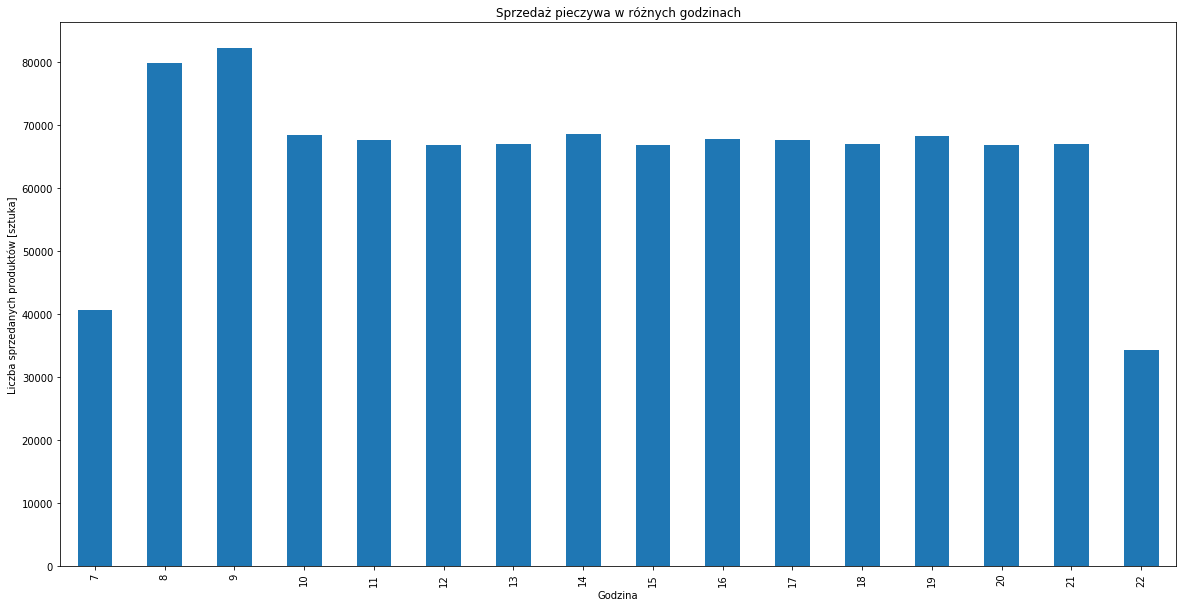

In [18]:
plt.figure(figsize=(20,10))
ax = dataRaw[dataRaw["product_category"] == "Pieczywo"].groupby("hour").quantity.sum().plot(kind = "bar")
ax.set(xlabel="Godzina", ylabel="Liczba sprzedanych produktów [sztuka]", title="Sprzedaż pieczywa w różnych godzinach")
plt.show()

#### Importy

In [19]:
from scipy import stats
from scipy.stats import ttest_ind, normaltest

### Test statystyczny na sprawdzenie Obserwacji 1 

1. Hipoteza statystyczna jest założeniem o parametrze populacji. To założenie może się okazać prawdziwe lub nie.

2. Mamy dwa typy hipotez statystycznych:
     - Hipoteza zerowa – oznaczana jako H0, jest zwykle hipotezą, gdzie wyniki z próbek obserwacyjnych wynikają z czystego przypadku.
     - Hipoteza alternatywna – oznaczano jako H1, jest hipotezą, gdzie wyniki z próbek obserwacyjnych są zdefiniowane przez jakąś nielosową przyczynę.
     
     
3. Jak interpretować wynik?
     - O interpretacji wyniku testu statystycznego decyduje metryka p-value. Jeśli p-value jest mniejsze od 0.05 to odrzucamy hipotezę zerową, w przeciwnym przypadku mówi się o braku podstawy do odrzucenia hipotezy zerowej.

#### ttest_ind - co zakłada? (fragment dokumentacji pakietu scipy)

scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')
Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

Hipoteza zerowa - dwie niezależne próbki mają takie same średnie
- jeśli p-value >= 0.05 - nie ma podstaw do odrzucenia hipotezy zerowej, próbki mają takie same średnie
- jeśli p-value < 0.05 - odrzucamy hipotezę zerową, próbki nie mają takiej samej średniej

##### Czy sprzedaż pieczywa jest istotnie wyższa statystycznie rano niż w pozostałych porach dnia? (Rano - 8 i 9)  

In [20]:
sprzedazPieczywa = dataRaw[dataRaw["product_category"] == "Pieczywo"]

In [21]:
rano = sprzedazPieczywa[sprzedazPieczywa["hour"].isin([8,9])]
nieRano = sprzedazPieczywa[~sprzedazPieczywa["hour"].isin([8,9])]
ttest_ind(rano["quantity"], nieRano["quantity"])

Ttest_indResult(statistic=49.59037603160165, pvalue=0.0)

### Sprawdzenie czasu wykonywania - czas tkwi w szczegółach

W celu optymalizacji czasu trwania wykonywania kodu należy zastanowić się nad kolejnością wykonywanych działań. 

Możemy wyliczyć sumę dla wszystkich kolumn, a następnie wybrać jedną z nich lub wybrać jedną kolumnę, a następnie wyliczyć dla niej sumę.

In [22]:
def groupByQuantity1(df, aggColName):
    df.groupby(aggColName).sum().quantity
    
def groupByQuantity2(df, aggColName):
    df.groupby(aggColName).quantity.sum()

Przypadek 1 : Funkcja agregująca i wybranie kolumny

In [23]:
import timeit

executionTime1 = timeit.timeit("groupByQuantity1(dataRaw, 'hour')", number=1, globals=globals())
print(executionTime1)

0.35282120000000106


Przypadek 2 : Wybranie kolumny i funkcja agregująca

In [24]:
executionTime2 = timeit.timeit("groupByQuantity2(dataRaw, 'hour')", number=1, globals=globals())
print(executionTime2)

0.034226799999999


Sprawdźmy to dla wielu powtórzeń

In [25]:
executionTime3 = timeit.timeit("groupByQuantity1(dataRaw, 'hour')", number=100, globals=globals())
print(executionTime3)

34.57762149999999


In [26]:
executionTime4 = timeit.timeit("groupByQuantity2(dataRaw, 'hour')", number=100, globals=globals())
print(executionTime4)

3.179961999999996


## Zadanie 1 : Sprzedaż nabiału w różne dni

### Jak wygląda ilość sprzedanych produktów o kategorii "Nabiał" zależnie od dnia tygodnia?

Obserwacja : Wolumen sprzedaży nabiału różni się w zależności od tego czy jest weekend czy dzień roboczy

## Przejdźmy do pracy w grupach

Podpowiedź: 
    1. Wybierz tylko wiersze w których product_category jest równe "Nabiał"
    2. Zgrupuj dane po dniu - .groupby("nazwa_kolumny")
    3. Wybierz odpowiednią kolumnę
    4. Wybierz odpowiednią agregację danych - .sum()
    5. Przedstaw wyniki na wykresie słupkowym

In [27]:
plt.figure(figsize=(20,10))

dataForPlot =  dataRaw["wybierz_odpowiednią_kategorię"]."grupowanie"."wybierz_kolumne"."funkcja_agregująca".plot("rodzaj wykresu")

ax = dataForPlot.plot(kind = "bar")

ax.set(xlabel="Dzień tygodnia", ylabel="Liczba sprzedanych produktów [sztuka]", title="Sprzedaż nabiału w różne dni tygodnia")
plt.show()

SyntaxError: invalid syntax (<ipython-input-27-4d96ba99c640>, line 3)

In [ ]:
#Sprawdzenie poprawności wyników
# Konstrukcja : assert <warunek_logiczny>, "Komunikat_błędu"
assert dataForPlot.iloc[0] == 9043, "Błędny wynik"

### Test statystyczny na potwierdzenie / odrzucenie hipotezy

In [ ]:
nabial_weekend = dataRaw["warunek_dla_wybrania_tylko_dni_weekendowych"]
nabial_weekday = dataRaw["warunek_dla_wybrania_tylko_dni_nie_weekendowych"]

ttest_ind(nabial_weekend["quantity"], nabial_weekday["quantity"])

## Zastanówmy się jaka może być przyczyna tych różnic

In [ ]:
dataFor2016 = dataRaw[dataRaw.year == 2016].groupby("weekday").quantity.sum()
dataFor2017 = dataRaw[dataRaw.year == 2017].groupby("weekday").quantity.sum()
dataFor2018 = dataRaw[dataRaw.year == 2018].groupby("weekday").quantity.sum()

In [ ]:
ax1 = dataFor2016.plot(kind = "bar")

In [ ]:
ax2 = dataFor2017.plot(kind = "bar")

In [ ]:
ax3 = dataFor2018.plot(kind = "bar")

## Obserwacja 2 : Sprzedaż w sieci sklepów rośnie 20- 25% r/r.

### Jaka była sprzedaż zależnie od roku?

#### Sprzedaż ilościowa?

In [28]:
dataRaw.groupby("year").quantity.sum()

year
2016    448730
2017    712241
2018    888662
Name: quantity, dtype: int64

#### Jak przełożyło się to na wartość sprzedaży?

In [29]:
dataRaw.groupby("year").cost.sum()

year
2016    1.446251e+06
2017    2.590935e+06
2018    3.481357e+06
Name: cost, dtype: float64

### Jaka była sprzedaż porównując rok do roku? 

... pod względem liczby sprzedanych produktów

In [30]:
dataRaw.groupby("year").quantity.sum().pct_change()

year
2016         NaN
2017    0.587237
2018    0.247698
Name: quantity, dtype: float64

... pod względem wartości sprzedaży produktów

In [31]:
dataRaw.groupby("year").cost.sum().pct_change()

year
2016         NaN
2017    0.791483
2018    0.343668
Name: cost, dtype: float64

#### Sprawdźmy to ręcznie ?

In [32]:
(2.590935e+06 - 1.446251e+06) / 1.446251e+06

0.791483635966371

In [33]:
(3.481357e+06 - 2.590935e+06) / 2.590935e+06

0.34366821244068263

### Jak to wygląda na wykresie?

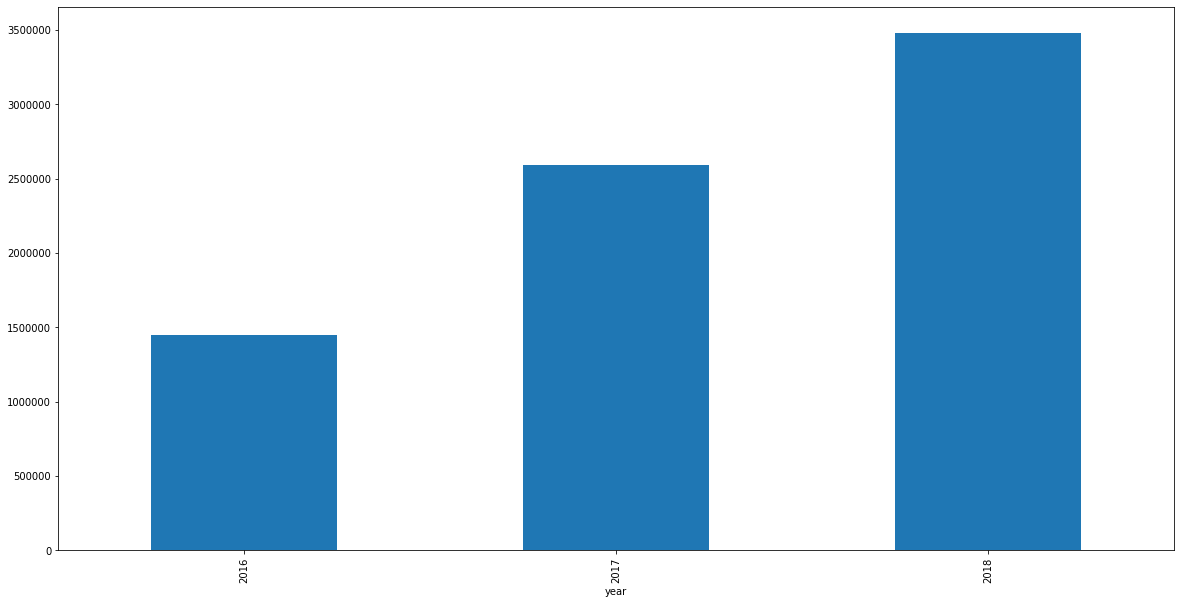

In [34]:
plt.figure(figsize=(20,10))
dataRaw.groupby("year").cost.sum().plot(kind = "bar")
plt.show()

## Zadanie 2 : Jak zmieniała się miesięczna sprzedaż w 2017? 


## Przejdźmy do pracy w grupach

Podpowiedź:
    1. Wykonaj filtrowanie wybierając tylko 2017
    2. Zgrupuj dane po miesiącu - .groupby("nazwa_kolumny")
    3. Wybierz odpowiednią kolumnę - .cost.
    4. Wykonaj odpowiednią agregację danych - .sum()

#### Jak wyglądała miesięczna sprzedaż w 2017 roku zależnie od miesiąca?

In [ ]:
monthly_sums_for_2017 = dataRaw["warunek filtrujący odpowiedni rok"]."grupowanie"."odpowiednia_kolumna"."funkcja_agregująca"
monthly_sums_for_2017

In [ ]:
assert round(monthly_sums_for_2017.loc[1]) == round(224913.49), "Błędny wynik"

#### Jak wygląda to na wykresie?

In [ ]:
plt.figure(figsize=(20,10))

dataRaw["warunek filtrujący odpowiedni rok"]."grupowanie"."odpowiednia_kolumna"."funkcja_agregująca".plot("rodzaj_wykresu")
plt.show()

#### Jak wyglądała procentowa zmiana?

In [ ]:
dataRaw["warunek filtrujący odpowiedni rok"]."grupowanie"."odpowiednia_kolumna"."funkcja_agregująca"."funkcja_licząca_zmianę"

#### Jak wyglądała procentowa miesięczna zmiana zależnie od roku?

In [ ]:
dataRaw."grupowanie_po_dwóch_kolumnach"."odpowiednia_kolumna"."funkcja_agregująca"."funkcja_licząca_zmianę"

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = "year", y= "quantity", data = dataRaw, hue = "month", estimator= sum)
plt.show()

#### Jaka była średnia procentowa miesięczna zmiana sprzedaży w 2017 roku?

In [ ]:
monthly_percentage_change = dataRaw["warunek filtrujący odpowiedni rok"]."grupowanie"."odpowiednia_kolumna"."funkcja_agregująca"."funkcja_licząca_zmianę"."funkcja_agregująca"
monthly_percentage_change

In [ ]:
assert monthly_percentage_change == -0.0040302756832553835, "Błędny wynik"

## Obserwacja 3 : Jak wprowadzenie zakazu handlu w niedziele odbiło się na dochodach sieci? 

### Ilość sprzedawanych produktów zależnie od roku

In [35]:
dataRaw.groupby("year").quantity.sum()

year
2016    448730
2017    712241
2018    888662
Name: quantity, dtype: int64

### Jak wyglądają dochody zależnie od roku

In [36]:
dataRaw.groupby("year").cost.sum()

year
2016    1.446251e+06
2017    2.590935e+06
2018    3.481357e+06
Name: cost, dtype: float64

### Jak wygląda to na wykresie?

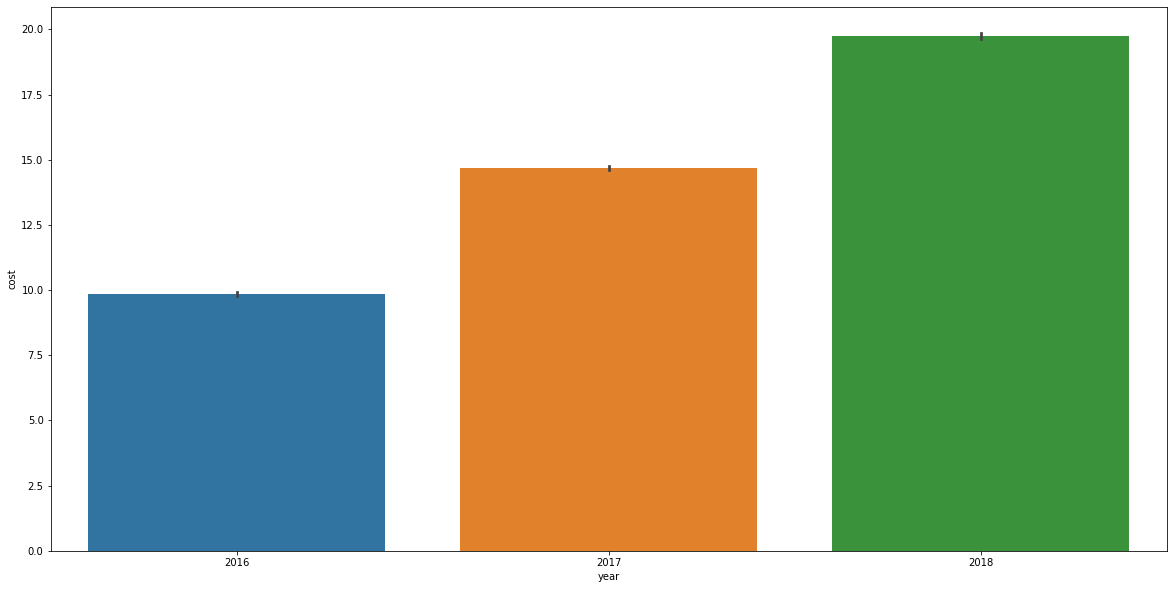

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x = "year", y= "cost", data = dataRaw)
plt.show()

### Co wyświetlane jest na wykresie? Średnia / mediana / suma ? 

https://seaborn.pydata.org/generated/seaborn.barplot.html

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = "year", y= "cost", data = dataRaw, estimator= sum) # musimy dodać parametr "estimator"
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x = "year", y= "quantity", data = dataRaw, hue = "weekday", estimator= sum)
plt.show()

## Zadanie 3 : Przedstaw na wykresie sprzedaż produktów w kategoriach Mięsa, Napoje, Przetwory i Inne w perspektywie lat z podziałem na dni

## Przejdźmy do pracy w grupach

Podpowiedź : 
    1. Wykorzystaj .isin([element1, element2, ...]) do wyfiltrowania odpowiednich kategorii produktów
    2. Przedstawe dane na wykresie sns.barplot(data = nazwa_dataframu, x = "kolumna_na_osi_OX", y = "kolumna_na_osi_OY",
        hue = "kolumna_tworząca_dodatkowy_podział", estimator = funkcja_agregująca)

In [ ]:
plt.figure(figsize=(20,10))
dataForPlot = dataRaw["wybierz produkty określonych kategorii"]
sns.barplot(x = "year", y= "cost", data = dataForPlot, hue = "weekday" , estimator= sum)
plt.show()

In [ ]:
assert round(dataForPlot.cost.mean(),2) == 19.82, "Błędny wynik"

## Obserwacja 4 : Sprzedaż poza Warszawą jest niższa o 20% 

In [ ]:
locFileName = "Lokalizacje.csv"

dataLocPath = os.path.join(dataFolderPath, locFileName)

locDataRaw = pd.read_csv(dataLocPath, index_col = "location_id")

In [ ]:
locDataRaw.head()

In [ ]:
dataWithLoc = dataRaw.merge(locDataRaw, left_on = "location_id", right_on = "location_id", how = "left")

In [ ]:
warszawaVsReszta = dataWithLoc.groupby("location_name").sum().quantity / dataWithLoc.groupby("location_name").sum().quantity["Warszawa"]

In [ ]:
plt.figure(figsize=(20,10))
warszawaVsReszta.plot(kind= "bar")
plt.show()

## Zadanie 4: Jaką część całości sprzedaży stanowi sprzedaż w Warszawie?

## Przejdźmy do pracy w grupach

### Jak wygląda to w ilości sprzedanych produktów?

In [ ]:
saleInWarsawQuantity = dataWithLoc["Warunek na lokalizację"]."Wybór kolumny"."funkcja_agregująca"
totalSaleQuantity = dataWithLoc."wybór kolumny"."funkcja_agregująca"

percentageWarsawVsOthersQuantity = ("dataframe1" / "dataframe2") *100
percentageWarsawVsOthersQuantity

### Jak wygląda to w dochodzie ze sprzedanych produktów?

In [ ]:
saleInWarsawCost = dataWithLoc["Warunek na lokalizację"]."Wybór kolumny"."funkcja_agregująca"
totalSaleCost = dataWithLoc."wybór kolumny"."funkcja_agregująca"

percentageWarsawVsOthersCost = ("dataframe1" / "dataframe2") *100
percentageWarsawVsOthersCost

#### Sprawdzenie poprawności otrzynamych wyników

In [ ]:
assert round(percentageWarsawVsOthersQuantity,1) == 38.2 , "Błędne dane"
assert round(percentageWarsawVsOthersCost,1) == 38.2 , "Błędne dane"

## Obserwacja 5 : Występowanie korealcji zakupionych produktów dla klientów

---------
### Czym jest korelacja i jak ją wyliczyć?

1. Analiza korelacji w statystyce polega na zbadaniu jak dwie zmienne są ze sobą powiązane.
2. Obliczany współczynnik zawiera się w przedziale od -1 do 1.
3. Jak interpretować wyniki (z dokładnością do ABS) : 
    - < 0, 0.3 > - związek słaby
    - ( 0.3, 0.5 > - związek umiarkowanie silny
    - ( 0.5 , 1 > - związek silny / bardzo silny
  
 Wynikiem .corr z biblioteki Pandas jest macierz N x N zawierająca współczynniki korelacji dla każdej możliwej pary produktów,   jednak wcześniej musimy doprowadzić dane do odpowiedniego formatu. 
 
 Format niezbędny do wyliczenia współczynników korelacji:
  - kolumny - produkty
  - indeksy - klienci
  - wartości - suma produktów danego typu dla konkretnego klienta
 
 Musimy zmienić format danych z: 

| Klient   | Produkt   | Liczba |
|-----------|-----------|--------|
| Klient_1 | Produkt_1 | 1      |
| Klient_2 | Produkt_2 | 2      |
| Klient_2 | Produkt_3 | 1      |
| Klient_3 | Produkt_1 | 2      |
| Klient_3 | Produkt_2 | 5      |


 na format : 


|          | Produkt_1 | Produkt_2 | Produkt_3 |
|-----------|-----------|-----------|-----------|
| Klient_1 | 1         | Nan       | Nan       |
| Klient_2 | NaN       | 2         | 1         |
| Klient_3 | 2         | 5         | Nan       |

W celu przygotowania takiej tabelu korzystamy z pd.pivot_table : 
     
    pd.pivot_table(dataframe, values="wartości_nowej_tabeli", index="indeksy_nowej_tabeli", columns="kolumny_nowej_tabeli", aggfunc= funkcja_agregująca)


In [ ]:
dataPivoted = pd.pivot_table(dataRaw, values='quantity', index="client_id", columns="product_id", aggfunc=np.sum)

In [ ]:
corr = dataPivoted.corr(method='spearman')

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
top10_correlated_products = corr.rename_axis('product2_id').unstack().abs().sort_values().drop_duplicates()[-10:-1]

In [ ]:
top10_correlated_products

In [ ]:
correlation_df = pd.DataFrame(top10_correlated_products, index = None).reset_index()

In [ ]:
correlation_df.columns

In [ ]:
columns_names = [str(x) for x in correlation_df.columns]
new_columns_names = ["product_1", "product_2", "corr_coef"]
columns_names_dict = dict(zip(columns_names, new_columns_names))
columns_names_dict

In [ ]:
correlation_df.columns = correlation_df.columns.map(str)

In [ ]:
correlation_df.columns

In [ ]:
correlation_df.rename(columns_names_dict , inplace=True)

In [ ]:
correlation_df

## Zadanie 5 : Jakie to produkty? 

## Przejdźmy do pracy w grupach

Podpowiedź : 
    1. Wczytaj dane z pliku "Produkty.csv" - pd.read_csv(...)
    2. Dołącz wczytane dane do dataframu dwukrotnie - dla obu produktów 

In [ ]:
prodFileName = "Produkty.csv"
dataProdPath = os.path.join(dataFolderPath, prodFileName)

prodDataRaw = pd.read_csv("podaj ścieżkę z której chcesz wczytać dane")
productsDf = prodDataRaw[["product_id", "product_name"]]

In [ ]:
correlation_df

In [ ]:
productsDf

In [ ]:
correlation_df_with_names = correlation_df.merge(productsDf, left_on = "Kolumna z pierwszego datasetu, po której chcemy się łączyć", right_on = "Kolumna z drugiego datasetu, po której chcemy się łączyć", how = "jaki rodzaj łączenia chcemy zastosować")
correlation_df_with_names = correlation_df_with_names.merge(productsDf, left_on = "Kolumna z pierwszego datasetu, po której chcemy się łączyć", right_on = "Kolumna z drugiego datasetu, po której chcemy się łączyć", how = "jaki rodzaj łączenia chcemy zastosować")

In [ ]:
correlation_df_with_names

In [ ]:
assert correlation_df_with_names.iloc[0].product_id_y == 52, "Błędne dane"

## Zadanie 6 : Sprawdzenie korelacji występowania kategorii produktów

## Przejdźmy do pracy w grupach

Podpowiedź:
    1. Wykonaj pd.pivot_table
    2. Na pivot_table wywołaj .corr() dla wyliczenia współczynników korelacji między poszczególnymi elementami macierzy
    3. Przedstawe wyniki na heatmapie 
    4. Sprawdź jakie kategorie produktów są ze sobą najbardziej skorelowane

In [ ]:
dataPivoted = pd.pivot_table("nazwa datasetu", values="Kolumna tworząca wartości tabeli", index="Kolumna tworząca indesy tabeli", columns="Kolumna tworząca kolumny tabeli", aggfunc="funkcja_agregująca")

In [ ]:
corr = dataPivoted."Funkcja wyliczająca współczynniki korelacji"

In [ ]:
plt.figure(figsize=(20,10))
sns."rodzaj wykresu tworzący heatmape"(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [ ]:
top_correlated_products_categories = corr.unstack().abs()."Funkcja sortująca".drop_duplicates()[-10:-1]
top_correlated_products_categories

In [ ]:
assert round(top_correlated_products_categories.Inne.Pieczywo, 2) == 0.28 , "Błędny wynik"